# relplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.relplot()` библиотеки **seaborn** является универсальной функцией для визуализации отношений между переменными и используется для создания различных типов реляционных графиков, таких как линейные графики (`lineplot`) и точечные графики (`scatterplot`).

Основные параметры функции :
- `data`: DataFrame, массив с данными;
- `x, y`: имена переменных, которые будут отображены на осях X и Y, соответственно;
- `hue`: переменная для группировки данных по цвету;
- `size`: переменная, значение которой будет использоваться для изменения размера точек;
- `style`: переменная, значение которой будет использоваться для изменения стиля точек или линий;
- `units`: имя переменной, которая определяет семантические подгруппы для раздельного отображения каждой точки;
- `weights`: имя переменной, которая определяет веса точек (используется при построении регрессии или других статистических моделей);
- `row`: имя переменной, которая определяет, как данные будут разбиты на строки при использовании нескольких подграфиков;
- `col`: имя переменной, которая определяет, как данные будут разбиты на столбцы при использовании нескольких подграфиков;
- `col_wrap`: количество столбцов в сетке подграфиков до переноса на новую строку;
- `row_order`: порядок, в котором строки должны быть отображены;
- `col_order`: порядок, в котором столбцы должны быть отображены;
- `palette`: параметр, определяющий цветовую палитру для переменной hue. Может быть именем палитры, списком цветов или словарем, отображающим уровни переменной в цвета;
- `hue_order`: порядок отображения уровней переменной hue;
- `hue_norm`: нормализация для цветовой палитры;
- `sizes`: значения для переменной size, которые будут отображены в виде размеров маркеров. Может быть словарем или списком значений;
- `size_order`: порядок отображения уровней переменной size;
- `size_norm`: нормализация для размеров маркеров;
- `markers`: маркеры для переменной style. Может быть списком или словарем;
- `dashes`: определяет типы линий (например, пунктирные) для переменной style;
- `style_order`: определяет порядок отображения уровней переменной style;
- `legend`: управляет отображением легенды ('auto', 'brief', 'full', или False);
- `kind`: тип графика. Может быть 'scatter' (по умолчанию) для диаграммы рассеяния или 'line' для линейного графика;
- `height`: управляет высотой каждого подграфика (по умолчанию height=5);
- `aspect`: соотношение ширины и высоты каждого подграфика (по умолчанию aspect=1).

Для рассмотрения примеров загрузим датасет 'taxis' из библиотеки seaborn, содержащий информацию о поездках на такси в Нью-Йорке:

In [3]:
taxis = sns.load_dataset('taxis').dropna()

taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

In [4]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

Столбцы датафрейма содержат следующую информацию:
- `'pickup'-`: Дата и время, когда пассажир был подобран.
- `'dropoff'-`: Дата и время, когда пассажир был высажен.
- `'passengers'-`: Количество пассажиров в поездке.
- `'distance'-`: Расстояние поездки, измеренное в милях.
- `'fare'-`: Стоимость проезда без учета чаевых и сборов, измеренная в долларах.
- `'tip'-`: Чаевые, данные водителю, измеренные в долларах.
- `'tolls'-`: Плата за проезд по платным дорогам, измеренная в долларах.
- `'total'-`: Общая стоимость поездки, включающая проезд, чаевые и сборы, измеренная в долларах.
- `'color'-`: Цвет такси (желтое или зеленое).
- `'payment'-`: Способ оплаты (наличные, кредитная карта).
- `'pickup_zone'-`: Зона, в которой был подобран пассажир.
- `'dropoff_zone'-`: Зона, в которой пассажир был высажен.
- `'pickup_borough'-`: Район города, в котором был подобран пассажир (Manhattan, Queens, Bronx, Brooklyn).
- `'dropoff_borough'-`: Район города, в котором пассажир был высажен.

In [5]:
taxis['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

Поскольку датасет содержит большое количество наблюдений, выделим из него данные, относящиеся к району Куинс, где был подобран пассажир:

In [6]:
df = taxis[taxis['pickup_borough'] == 'Queens']

df.head()

pickup             dropoff  passengers  distance  fare   tip  \
10 2019-03-16 10:02:25 2019-03-16 10:22:29           1      3.90  17.0  0.00   
22 2019-03-28 17:20:54 2019-03-28 17:55:57           1      9.82  31.5  8.31   
43 2019-03-27 19:39:16 2019-03-27 20:00:26           1      9.50  28.0  0.00   
53 2019-03-20 18:49:24 2019-03-20 19:12:40           1     13.45  36.0  0.00   
56 2019-03-05 17:57:00 2019-03-05 18:45:25           2     19.59  52.0  0.00   

    tolls  total   color      payment        pickup_zone  \
10   0.00  17.80  yellow         cash  LaGuardia Airport   
22   5.76  49.87  yellow  credit card  LaGuardia Airport   
43   5.76  35.06  yellow         cash  LaGuardia Airport   
53   0.00  37.80  yellow         cash        JFK Airport   
56   5.76  65.56  yellow  credit card        JFK Airport   

                     dropoff_zone pickup_borough dropoff_borough  
10                        Astoria         Queens          Queens  
22  Sutton Place/Turtle Bay North         Queens       Manhattan  
43       Washington Heights South         Queens       Manhattan  
53                      Sunnyside         Queens          Queens  
56          Upper East Side North         Queens       Manhattan

Теперь построим график `relplot`, в котором по оси `X` отложим дату и время посадки пассажира в такси, а по оси `Y` - общую стоимость поездки:



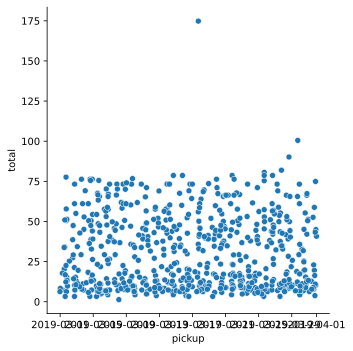

In [7]:
sns.relplot(data=df, x='pickup', y='total')
plt.show()

По умолчанию была построена диаграмма рассеяния. Видим, произошло наложение меток на оси `X` друг на друга. Эту неприятность можем исправить двумя способами: либо расширить ось `X`, либо поменять угол наклона меток.

Расширить ось `X` можно с применением параметра `aspect`, который регулирует соотношение ширины и высоты графика. Например, сделаем график шире его высоты в 2.2 раза:

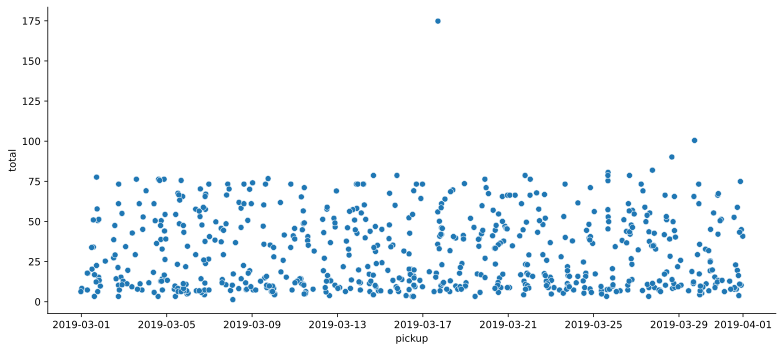

In [8]:
sns.relplot(data=df, x='pickup', y='total',
            aspect=2.2);

Второй способ - это повернуть метки оси на определённый угол. Сделать это можно при помощи функции `plt.xticks()` библиотеки *matplotlib*, которая имеет параметр `rotation` для этих целей. Например, переведём метки оси `X` из горизонтального положения в вертикальное, повернув их на 90 градусов:

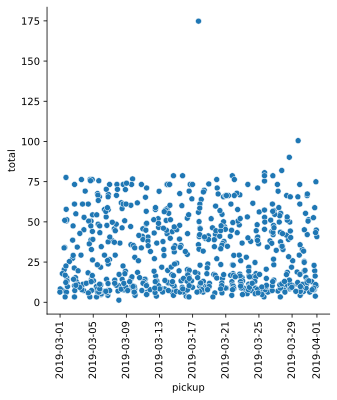

In [9]:
sns.relplot(data=df, x='pickup', y='total')
plt.xticks(rotation=90)
plt.show()

Функция `sns.relplot()` имеет в своём арсенале параметр `hue`, позволяющий визуально отделять разные категории. Например, визуально разделим точки по цвету такси:

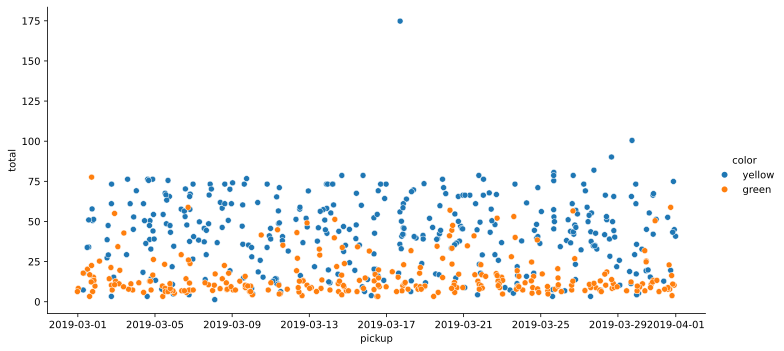

In [11]:
sns.relplot(data=df, x='pickup', y='total',
            aspect=2.01,
            hue='color')
plt.show();

Параметром `palette` поменяем цветовое отображение точек на графике:

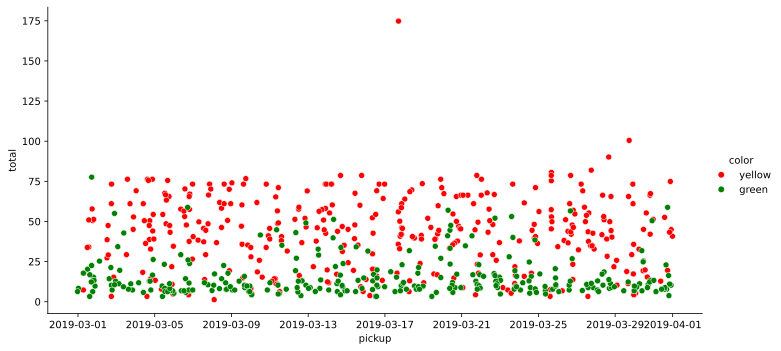

In [13]:
sns.relplot(data=df, x='pickup', y='total',
            aspect=2,
            hue='color',
            palette=['red', 'green'])
plt.show();

Далее попробуем скомпоновать данные на графике по дням недели, для чего воспользуемся методом `dt.day_name()`,  который переводит данные формата `'datetime64'` в дни недели.

In [14]:
df['pickup'].dt.day_name()

10       Saturday
22       Thursday
43      Wednesday
53      Wednesday
56        Tuesday
          ...    
6403       Friday
6417       Sunday
6418     Saturday
6423      Tuesday
6429       Sunday
Name: pickup, Length: 638, dtype: object

Теперь построим график и посмотрим на результат:

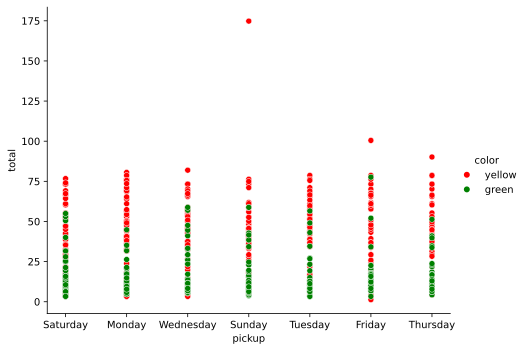

In [15]:
sns.relplot(data=df, x=taxis['pickup'].dt.day_name(), y='total',
            aspect=1.3,
            hue='color',
            palette=['red', 'green'])
plt.show()

В итоге у нас построился график с распределением стоимости поездки по дням недели, с той лишь проблемой, что дни недели отображены по оси `X` не по порядку. А расположились они в порядке следования в основном датафрейме taxies.

In [16]:
taxis['pickup'].dt.day_name()

0        Saturday
1          Monday
2       Wednesday
3          Sunday
4        Saturday
          ...    
6428       Sunday
6429       Sunday
6430     Saturday
6431       Monday
6432    Wednesday
Name: pickup, Length: 6341, dtype: object

Для того, чтобы отобразить дни недели на графике по порядку, проведём следующие манипуляции. Сначала создадим дополнительный столбец `'pickup_day_name'`, содержащий дни недели:



In [17]:
df['pickup_day_name'] = df['pickup'].dt.day_name()

df.head(2)

C:\Users\ardat\AppData\Local\Temp\ipykernel_42728\384987275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day_name'] = df['pickup'].dt.day_name()


pickup             dropoff  passengers  distance  fare   tip  \
10 2019-03-16 10:02:25 2019-03-16 10:22:29           1      3.90  17.0  0.00   
22 2019-03-28 17:20:54 2019-03-28 17:55:57           1      9.82  31.5  8.31   

    tolls  total   color      payment        pickup_zone  \
10   0.00  17.80  yellow         cash  LaGuardia Airport   
22   5.76  49.87  yellow  credit card  LaGuardia Airport   

                     dropoff_zone pickup_borough dropoff_borough  \
10                        Astoria         Queens          Queens   
22  Sutton Place/Turtle Bay North         Queens       Manhattan   

   pickup_day_name  
10        Saturday  
22        Thursday

Далее сделаем этот столбец категориальным с определённым порядком следования категорий:

In [18]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day_name'] = pd.Categorical(df['pickup_day_name'], categories=day_order, ordered=True)

C:\Users\ardat\AppData\Local\Temp\ipykernel_42728\3448856901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day_name'] = pd.Categorical(df['pickup_day_name'], categories=day_order, ordered=True)


Параметр `categories` задаёт фиксированный список категорий, а `ordered=True` указывает, что категории упорядочены.

Теперь построим график:

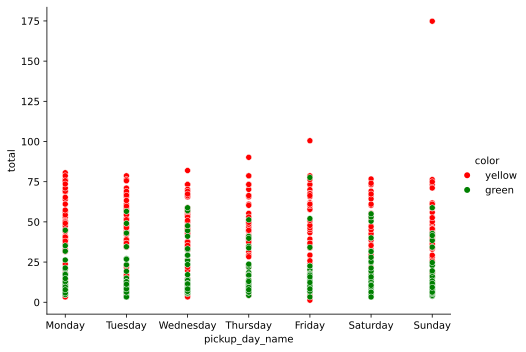

In [20]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.3,
            hue='color',
            palette=['red', 'green'])
plt.show();

**Параметр kind**

Параметр `kind='line'` позволяет изменить тип графика на линейный. 

Например:

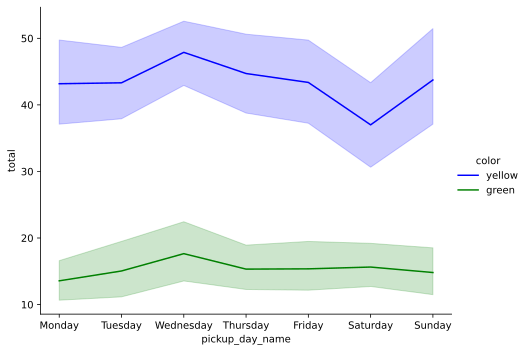

In [23]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.3,
            hue='color',
            palette=['blue', 'green'],
            kind='line')
plt.show()

Если нужно не показывать доверительные интервалы, то параметру `errorbar` следует передать значение `None`:

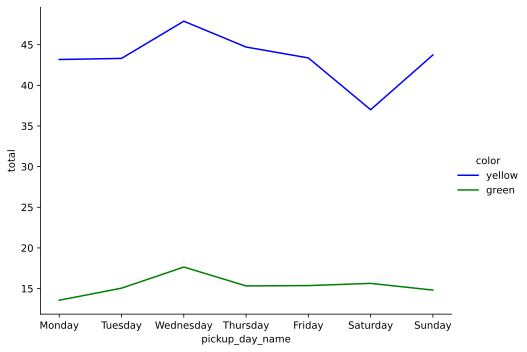

In [25]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.3,
            hue='color',
            palette=['blue', 'green'],
            kind='line',
            errorbar=None)
plt.show()

Параметр `marker` добавляет точки на линейный график:

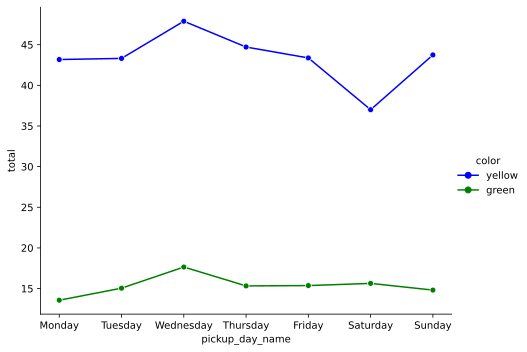

In [27]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.3,
            hue='color',
            palette=['blue', 'green'],
            kind='line',
            errorbar=None,
            marker='o')
plt.show()

**Параметр style**

Параметр `style` функции `sns.relplot()` используется для определения стиля точек или линий на графике в зависимости от категориальных данных.

Например, применим параметр `style` к линейному графику:

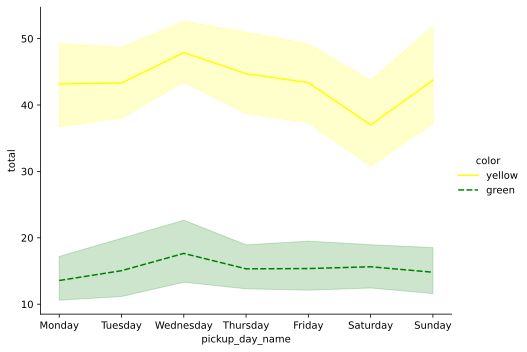

In [28]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.3,
            hue='color',
            palette=['yellow', 'green'],
            kind='line',
            style='color')
plt.show()

Стили отображения линий изменились в зависимости от категорий.

У пользователей также имеется возможность вручную менять стили линий при помощи параметра `dashes`. Этот параметр принимает список кортежей, где каждый кортеж определяет длину штриха и пробела. Например, (2, 2) означает, что линия будет состоять из повторяющихся сегментов с длиной штриха 2 и длиной пробела 2.

Например:

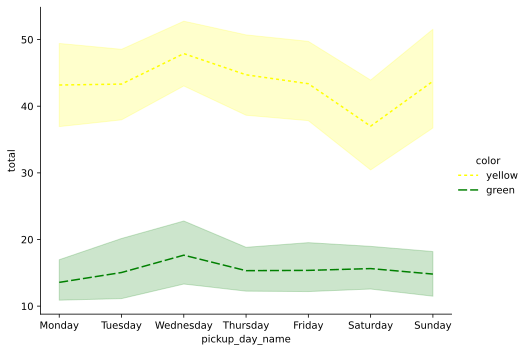

In [29]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.3,
            hue='color',
            palette=['yellow', 'green'],
            kind='line',
            style='color',
            dashes=[(2, 2), (6, 2)])
plt.show()

При условии, когда рисуется диаграмма размаха, параметр `style` управляет формой точек. Например:

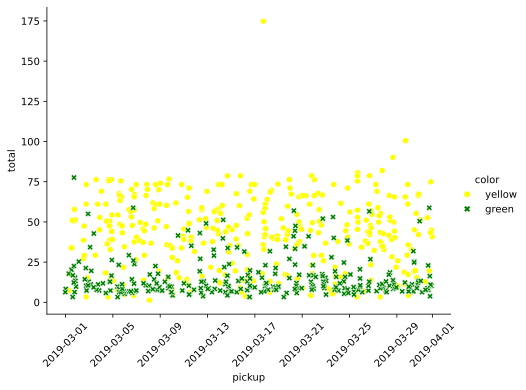

In [30]:
sns.relplot(data=df, x='pickup', y='total',
            aspect=1.3,
            hue='color',
            palette=['yellow', 'green'],
            style='color')
plt.xticks(rotation=45)
plt.show()

**Параметр size**

Параметр `size` используется для определения размера точек на графике в зависимости от значений определенной переменной.

Пример использования:

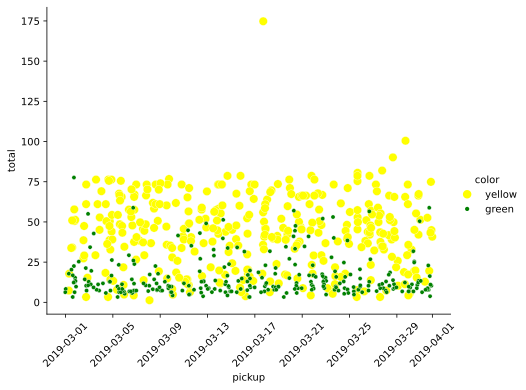

In [31]:
sns.relplot(data=df, x='pickup', y='total',
            aspect=1.3,
            hue='color',
            palette=['yellow', 'green'],
            size='color')
plt.xticks(rotation=45)
plt.show()

**Параметры col, row, col_wrap**

Параметр `col` функции `sns.relplot()` используется для создания нескольких подграфиков, организованных в столбцы, на основе категориальной переменной. В качестве значения для параметра `col` указывается имя категориальной переменной из датасета.

Для примера разделим график на подграфики, расположенные в виде колонок, в зависимости от типа оплаты за проезд:

In [38]:
df['payment'].unique()

array(['cash', 'credit card'], dtype=object)

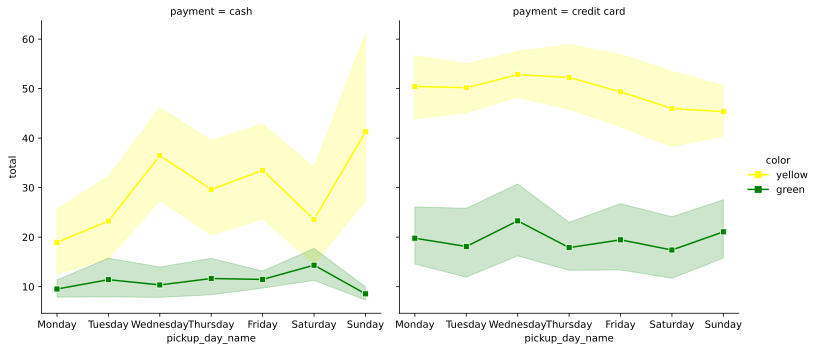

In [37]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.05,
            hue='color',
            palette=['yellow', 'green'],
            marker='s',
            kind='line',
            col='payment')
plt.show();

Параметр `row` создаёт подграфики, располагая их в строки в соответствии с категориальной переменной. Например:

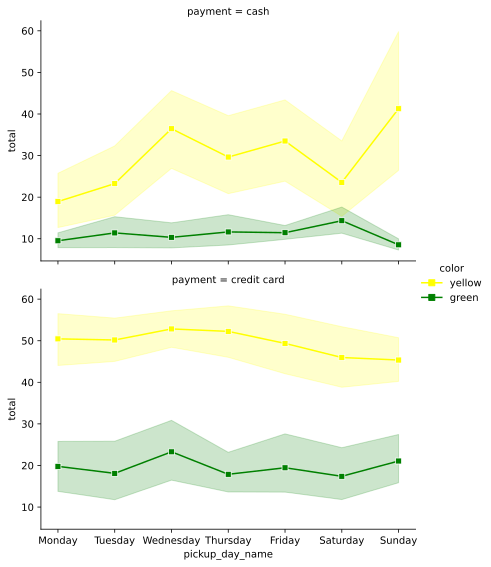

In [39]:
sns.relplot(data=df, x='pickup_day_name', y='total',
            aspect=1.5,
            height=4,
            hue='color',
            palette=['yellow', 'green'],
            marker='s',
            kind='line',
            row='payment')
plt.show()

В этом примере также при помощи параметра `height` немного уменьшили высоту каждого подграфика.

Рассмотрим ещё один пример. Используя данные из датафрейма `taxis`, содержащего информацию по всем районам, создадим диаграммы рассеяния. По оси `X` будем откладывать дату и время посадки пассажиров в такси, а по оси `Y` - общую стоимость поездки. Дополнительно, с помощью параметра `col`, разобьём графики на подграфики по районам посадки пассажиров.

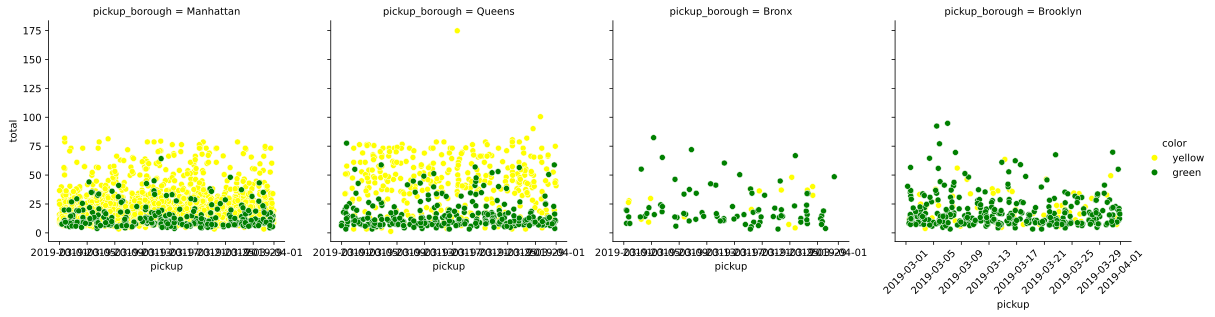

In [40]:
sns.relplot(data=taxis, x='pickup', y='total',
            height=4,
            hue='color',
            palette=['yellow', 'green'],
            col='pickup_borough')
plt.xticks(rotation=45)
plt.show()

В этом случае метки оси `X` изменили угол своего отображения только на последнем графике. Чтобы исправить это, можно выполнить следующую манипуляцию:

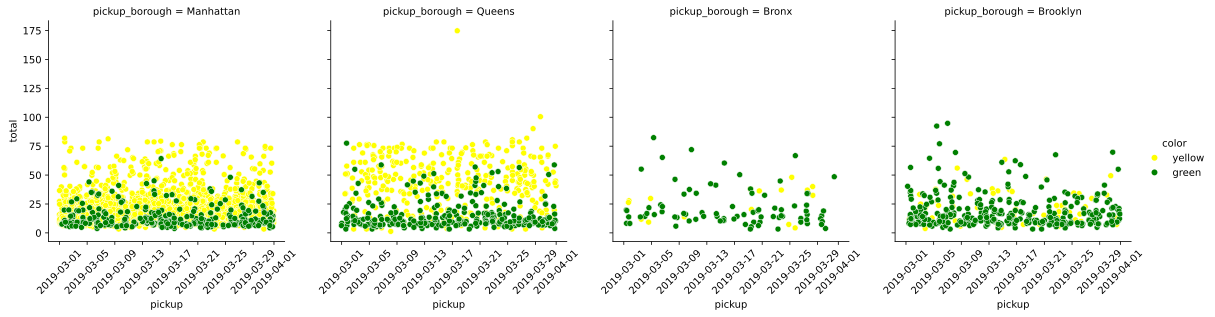

In [41]:
g = sns.relplot(data=taxis, x='pickup', y='total',
                height=4,
                hue='color',
                palette=['yellow', 'green'],
                col='pickup_borough')

for ax in g.axes.flat: 
    for label in ax.get_xticklabels(): 
        label.set_rotation(45)

plt.show();

Давайте разберёмся, что делает данный код. Во-первых, результат выполнения функции `sns.relplot()` сохраняется в переменной `g`, что позволяет впоследствии применять к ней различные методы.

Далее используется цикл с вложенным циклом:

`g.axes.flat` - это итератор, позволяющий перебрать все подграфики в последовательности. То есть сначала переменная `ax` принимает результат выполнения первого подграфика. Затем происходит выполнение вложенного цикла:

Метод `get_xticklabels()` позволяет получить доступ к меткам на оси `X`, чтобы их можно было настроить. То есть переменная `label` последовательно принимает значения меток по оси `X` первого подграфика и методом `set_rotation(45)` поворачивает каждую метку на 45 градусов. Когда все метки первого подграфика пройдены, переменная `ax` принимает результат выполнения второго подграфика и т.д.


Когда переменная, передаваемая параметру `col`, имеет много значений, удобно использовать параметр `col_wrap`, который управляет количеством столбцов в сетке графиков. Параметр `col_wrap` задаёт количество столбцов, после которого графики будут переноситься на новую строку.

Применим параметр `col_wrap` к предыдущему графику, уменьшив количество столбцов до двух:

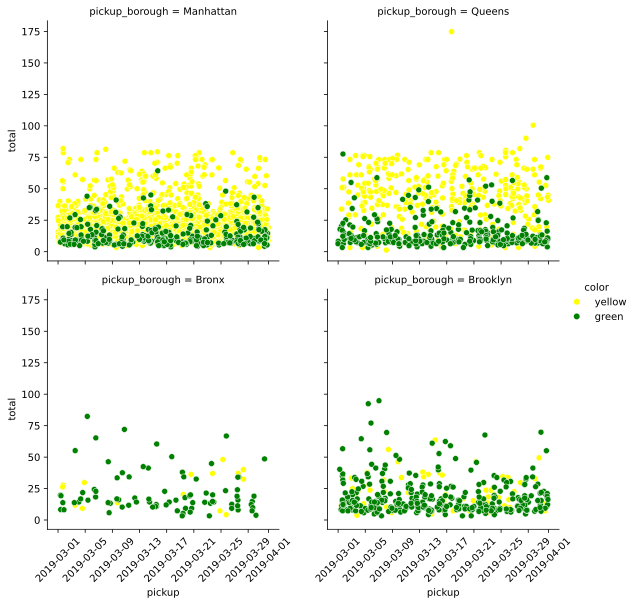

In [42]:
g = sns.relplot(data=taxis, x='pickup', y='total',
                height=4,
                hue='color',
                palette=['yellow', 'green'],
                col='pickup_borough',
                col_wrap=2)

for ax in g.axes.flat: 
    for label in ax.get_xticklabels(): 
        label.set_rotation(45)

plt.show();